In [5]:
# import packages
import sys
sys.path.append('../')
import pickle
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
# import gensim
#from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
# from wordcloud import WordCloud

In [6]:
#load labelled data (generated in file 2.preprocessing_de)
data = pd.read_pickle('data_n_models/de_df_labelled.pkl')


In [7]:
data = pd.read_pickle(r'data_n_models/de_df_labelled.pkl')

In [8]:
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...


In [9]:
def classify_bots(df):
    #collect all the account names related to bots and scripts
    names = []
    pat = r'(bot\s|script|bot_)'
    for name in df.name.unique():
        match = re.findall(pat, name, re.IGNORECASE) 
        if len(match) > 0:
            names.append(name)
    #look for a key words to identify a tweet related to bots and scripts
    pattern = r"(script|bot\s|bots\s|bot_|cook|cop^e|destroy|proxy)"
    df['bot'] = False
    for i, row in df.iterrows():
        match = re.findall(pattern, row.tweet, re.IGNORECASE) 
        if len(match) > 0 or row.isin(names)['name'] == True:
            df['bot'].loc[i] = True
    return df

In [10]:
# apply function
data = classify_bots(data)

C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
# create a df with only no bots
data = data[data['bot'] == False]
data.bot.value_counts()

False    2679
Name: bot, dtype: int64

In [12]:
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False


In [13]:
for i, value in data[1:20].lemma.iteritems():
    print(i, value)

1 aber erst wenn ich wieder dürfen verspielen
2 good news all interessieren mitarbeiterinnen der berliner erhalten täglich einen mobilitätsbudget höhe von der ich für fahrten mit miles einlösen können danke der der ganze aktion sponsern
3 ich weiß dass der schein rein muss aber sein mit der einzeln code auf der bild der sein einen aufkleber muss der auch auf der paket
4 ich hab sich nur fragen wofür dies extra code sein
5 ich hab doch schon der rücksendeschein draufgeklebt der sein mit dabei
6 bestellen heute noch immer nicht eintreffen service
7 der sein echt zum mäusemelken
8 solche lose
9 wie gut dass ich auch genau der nicht tun habe
10 hey meinen bestellung werden nie aus der packstation entnehmen und sein nachweislich zurücksenden werden dennoch bekommen ich von sich einen mahnung soll der zalandofail
11 hallo wann haben mein endlich ein rabatt code für sich ich sein auf entzug ich shoppen zalandopluskunde
12 habe gerade beim mitbewerber bestellen und zahlen dort auch wenig
13 un

In [14]:
def define_team(df):
    pattern_payment = r"(packstation|mahnung|rechnung|zahlung|ausgleich|schlussrechnung|kassenbeleg|quittung|kassenbon|budget|voranschlag|belastung|abrechnung|aufstellung|summe|betrag|abgabe|auszahlung|gebühr|vorkasse|kreditkarte|debit|schulden)"
    pattern_logistics= r"(transport|lager|lagerung|verkehr|verpackung|logistik|einhaltung|erfüllung|beachtung|warten|termin|bestand)"
    pattern_weather = r"(Iembot|Iem)"
    pattern_fit = r"(size|fit|small|large|medium|schnitt|sitz|größe|art|style|form|zuschnitt|gestalt|ausführung)"
    pattern_catalog = r"(katalog|warenkatalog|übersicht|verzeichnis|stichwortverzeichnis)"
    pattern_reco = r"(empfehlung|tipp|hilfe|hilfestellung|beistand|lehre|hinweis|rat|ratschlag)"
    pattern_sust = r"(nachhaltigkeit|umwelt|umweltfreundilich|zukunfsfähig|umgebung|natur|naturschutz|schutz|klima|klimawandel|nachhaltig)"
    pattern_outfit = r"(mode|fashion|aufzug|look|lifestyle|anzug|stil)"

    df['team'] = 'Other'
    for i, row in df.iterrows():
        
        match_logistics = re.findall(pattern_logistics, row.lemma, re.IGNORECASE) 
        if len(match_logistics) > 0:
            df['team'].loc[i] = 'Logistics'

        match_payment = re.findall(pattern_payment, row.lemma, re.IGNORECASE) 
        if len(match_payment) > 0:
            df['team'].loc[i] = 'PayBill'

        match_weather = re.findall(pattern_weather, row['name'], re.IGNORECASE) 
        if len(match_weather) > 0:
            df['team'].loc[i] = 'Weather'

        match_fit = re.findall(pattern_fit, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'SizeFit'

        match_catalog = re.findall(pattern_catalog, row.lemma, re.IGNORECASE) 
        if len(match_catalog) > 0:
            df['team'].loc[i] = 'Catalog'
        
        match_reco = re.findall(pattern_reco, row.lemma, re.IGNORECASE) 
        if len(match_reco) > 0:
            df['team'].loc[i] = 'Reco'


        match_sust = re.findall(pattern_sust, row.lemma, re.IGNORECASE) 
        if len(match_sust) > 0:
            df['team'].loc[i] = 'Sust'

        match_outfit = re.findall(pattern_outfit, row.lemma, re.IGNORECASE) 
        if len(match_outfit) > 0:
            df['team'].loc[i] = 'Outfit'

    return df

In [15]:
teams = define_team(data)

C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,team
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False,Reco
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False,Other
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False,PayBill
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False,Other
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False,Other


In [17]:
teams.shape

(2679, 20)

In [18]:
teams.team.value_counts()

Other        1977
SizeFit       327
Outfit        184
Reco           76
PayBill        53
Sust           36
Logistics      20
Weather         5
Catalog         1
Name: team, dtype: int64

In [19]:
teams.lemma

0       viel spaß damit einen wahl gewinnen stellen si...
1             aber erst wenn ich wieder dürfen verspielen
2       good news all interessieren mitarbeiterinnen d...
3       ich weiß dass der schein rein muss aber sein m...
4       ich hab sich nur fragen wofür dies extra code ...
                              ...                        
2704    gehen eigentlich bei der zalando werbung der f...
2705    signalwirkung für der gesamt branche der berli...
2706    hauptsach ich bstell fluffy badmäntel zalando ...
2707    und einen ander band sein nix bdig für xiaomi ...
2708    als der pfeifen nen laden gehen werden zalando...
Name: lemma, Length: 2679, dtype: object

In [20]:
#testing results by checking random 10 tweets
sample = teams[teams.team == 'Logistics'].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

383 AngeloM29967209 @TBreitschneider Ich geh ja nicht zum Arzt also wieso Termin? Da brauchen die sich nicht wundern wenn Amazon, Zalando und Co alles abräumen.
276 Chickenwing64 Morgen kommt mein Päckchen von Zalando und ich freue mich drauf die Sachen in Ruhe anzusehen und anzuprobieren.
Und das alles ohne Termin, Zeitdruck, Maske, Ausweis und einer Verkäuferin die nach 10 Minuten auf die Uhr sieht. https://t.co/1nRQwlzigB
706 Handelszeitung Zalando öffnet Outlet in Konstanz – aber nur gegen Termin https://t.co/PShTeOK2lt https://t.co/hiCDELWWBs
1437 OscarPe54609380 @welt Die Frau eines Deutschen Freundes hatte seit 15 Jahren ein Reisebüro, jetzt arbeitet sie bei Zalando im Lager und darf die Miete noch bis August zahlen... sie schreit vor Glück!
1336 handelsblatt Für viele Geschäfte ist das Einkaufen mit Termin zumindest ein Hoffnungsschimmer. Es ist nicht richtig, das Instrument gleich wieder zu verbieten. https://t.co/VBHqQbRQ8W
1041 NIB_2015 Zalando öffnet Outlet in Konstanz – ab

In [21]:
# pattern_catalog = r"(katalog|warenkatalog|übersicht|verzeichnis|stichwortverzeichnis)"

#testing results by checking random 10 tweets
sample = teams[teams.team == 'PayBill'].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

1226 SAPConcurDACH Ein Online-Unternehmen wie #Zalando und analoge Prozesse bei der Reisekostenabrechnung? Zettelwirtschaft und digitale Ökonomie passen einfach nicht zusammen. https://t.co/rLf6Ftl1ZC
956 DasWoelkchen @ASOS_HilftEuch gibt es zur zeit ein problem ich gesuch jetzt zum zigsten mal mit verschiedenen zahlungsmethoden meine bestellung aufzugeben aber immer wenn ich auf den button "bestellen" click muss ich mich neu einloggen und dann beginnt spiel von vorne, auf all meinen geräten
746 Lisa10768523 Wer zahlt meine zalando Rechnung und darf danach brav meinr pussy lecken?
1457 sandfraeulein Ich habe meine Retouren in die Packstation gebracht. 

Unser Wohnzimmer ist wieder begehbar und Zalando &amp; Tchibo können ihre Webshops wieder befüllen. https://t.co/reXLTMTBtH
1478 jakobaee ich werd nie wieder bei @ASOS_HilftEuch bestellen. Die haben absolut scheiß regelungen. Wenn man nach 28 tagen Sachen zurückschickt (rechnung mit klarna) bekommt man nen rückgabegutschein. Hab das ink

<AxesSubplot:xlabel='team', ylabel='count'>

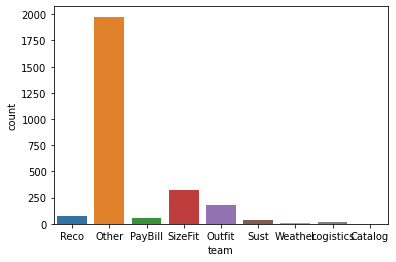

In [22]:
sns.countplot(data=teams, x='team')

<AxesSubplot:xlabel='team', ylabel='count'>

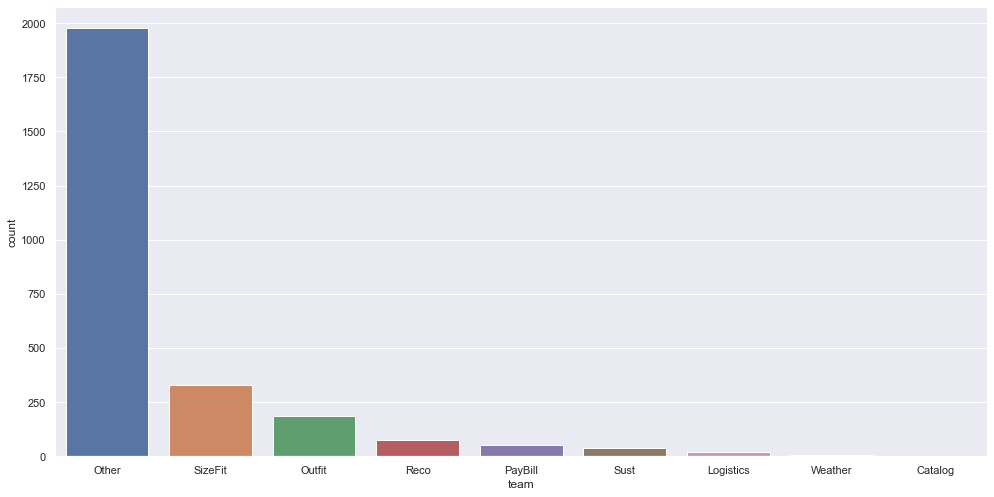

In [23]:
#distribution of tweets for topics
sns.set(rc={'figure.figsize':(16.7,8.27)})
sns.countplot(data=teams, order = teams['team'].value_counts().index, x='team')

<AxesSubplot:xlabel='keyword', ylabel='count'>

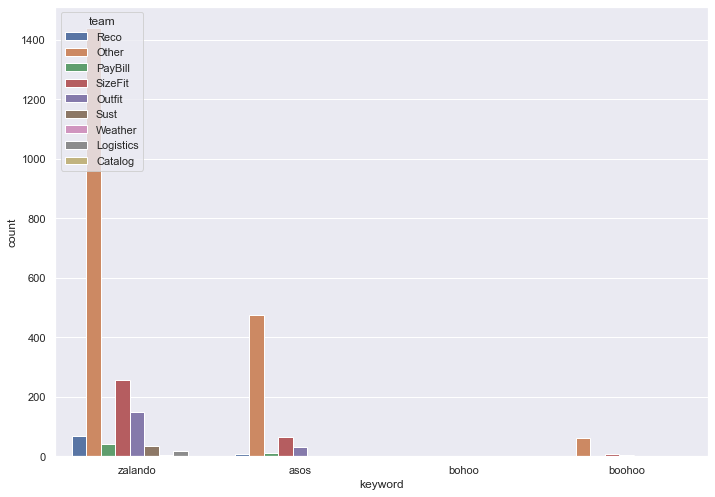

In [24]:
#distribition per topic per company
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=teams, x='keyword',hue='team')


<AxesSubplot:xlabel='team', ylabel='count'>

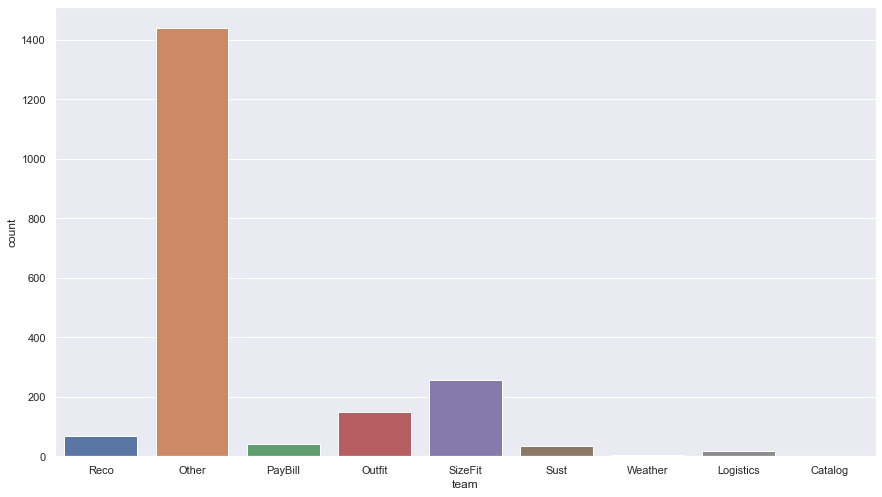

In [25]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.countplot(data=teams[teams['keyword']=='zalando'], x='team', orient='h')

In [26]:
zalando = teams[teams['keyword']=='zalando']

In [27]:
teams = teams[teams['keyword'].isin(['asos','zalando','boohoo'])]
teams = teams.drop(teams[teams['team']=='Weather'].index)


<AxesSubplot:xlabel='team', ylabel='compound'>

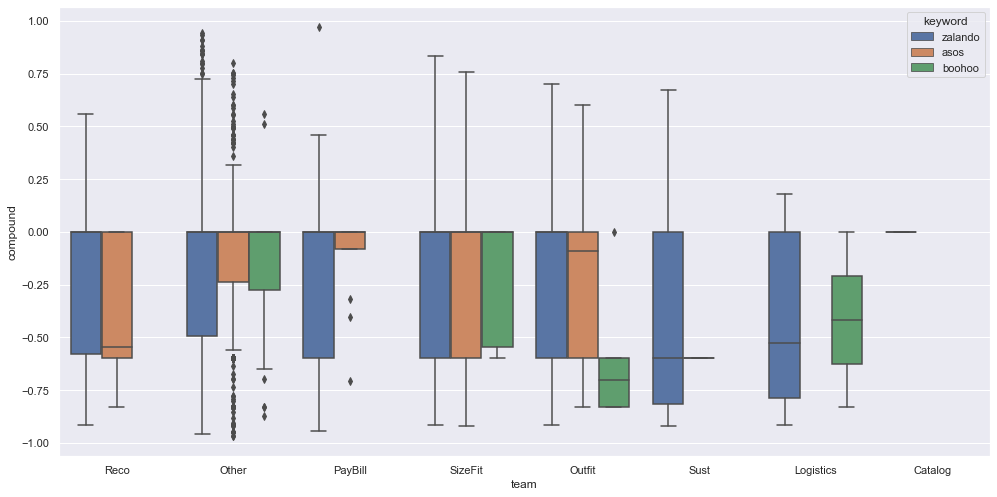

In [28]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
sns.boxplot(x="team", y="compound", data=teams, hue='keyword')

In [29]:
import numpy as np
teams['sentiment'] = teams['compound']
teams['sentiment'] = np.where(teams['sentiment']>=0.5, 1, teams['sentiment'])
teams['sentiment'] = np.where(teams['sentiment']<=-0.5, -1, teams['sentiment'])
teams['sentiment'] = np.where((teams['sentiment']>-0.5)&(teams['sentiment']<0.5), 0, teams['sentiment'])

In [30]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,...,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,team,sentiment
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,...,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False,Reco,-1.0
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,...,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False,Other,0.0
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,...,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False,PayBill,-1.0
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,...,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False,Other,0.0
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,...,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False,Other,0.0


In [31]:
pickle.dump(teams, open(r'.\data_n_models\5.de_df_teams_classified.pkl', 'wb'))

<AxesSubplot:xlabel='team', ylabel='count'>

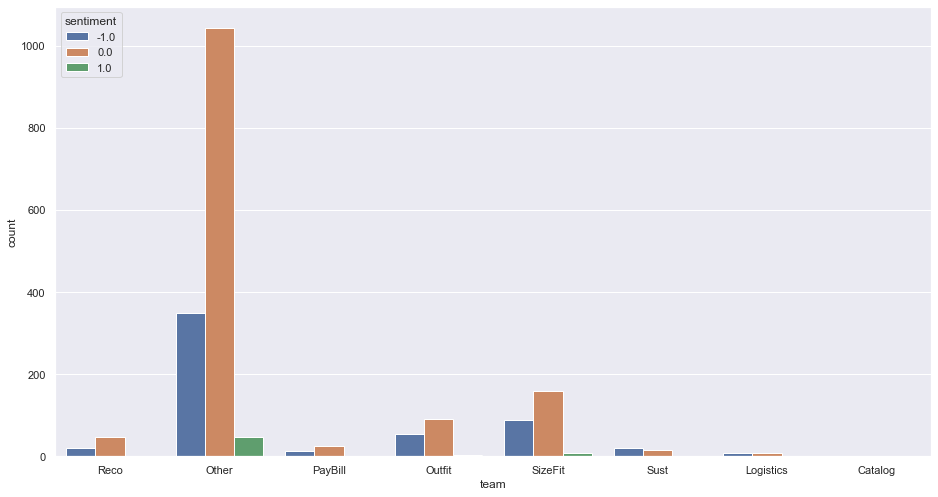

In [32]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(data=teams[teams['keyword']=='zalando'], x='team',hue='sentiment')

<AxesSubplot:xlabel='team', ylabel='count'>

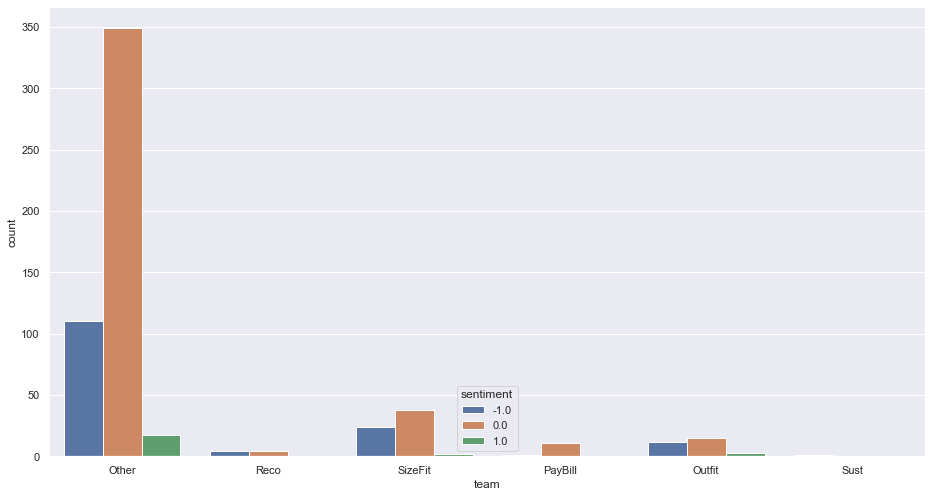

In [33]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(data=teams[teams['keyword']=='asos'], x='team',hue='sentiment')

In [34]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,...,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,team,sentiment
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,...,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False,Reco,-1.0
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,...,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False,Other,0.0
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,...,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False,PayBill,-1.0
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,...,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False,Other,0.0
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,...,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False,Other,0.0


In [35]:
from PIL import *
# Function to create a wordcloud
def create_wordcloud(tweet, path='data_n_models\wc_pos.png'):
    """ this function takes in two arguments, the path to save the file and the tweet"""
    mask = np.array(Image.open("data_n_models\cloud.png"))
    stopwords = set(STOPWORDS)
    stopwords.update(["boohoo","boohoo'" "asos","asos'",'Zalando','zalando','fuck',"fuck'", "zalando'",'bitch','shit'])
    wc = WordCloud(background_color='white', mask = mask, max_words=500, stopwords=stopwords, repeat=False)
    tweet = [tweet.strip("'") for tweet in tweet]
    wc.generate(str(tweet))
    wc.to_file(path)
    print('Word Cloud Saved Successfully')
    display(Image.open(path))
#Creating wordcloud for all tweets
create_wordcloud(teams['lemma'].values)

NameError: name 'STOPWORDS' is not defined

# clustering with LatentDirichletAllocation

https://ourcodingclub.github.io/tutorials/topic-modelling-python/

# on the whole dataset

In [33]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [34]:
 # Each row is a tweet and each column is a word. The numbers in each position tell us how many times this word appears in this tweet.
 tf

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
print(tf_feature_names)

['aber', 'afx', 'aktie', 'aktien', 'aktiencheck', 'all', 'alle', 'als', 'amazon', 'analyser', 'ander', 'asos', 'auch', 'auf', 'aus', 'bei', 'beim', 'bekommen', 'belassen', 'belässt', 'bestellen', 'bestellung', 'bis', 'bitte', 'boohoo', 'corona', 'damit', 'danke', 'dann', 'dass', 'der', 'deutsch', 'deutschen', 'deutschland', 'dies', 'doch', 'dpa', 'durch', 'dürfen', 'echt', 'ecommerce', 'eigentlich', 'ein', 'einen', 'einer', 'einfach', 'einstufung', 'erst', 'erwarten', 'etwas', 'euro', 'fashion', 'finanztreff', 'finden', 'fragen', 'frau', 'für', 'ganz', 'geben', 'gehen', 'geld', 'gerade', 'gibts', 'groß', 'gut', 'gutschein', 'gutscheine', 'hab', 'habe', 'haben', 'halt', 'heute', 'hier', 'hosen', 'ich', 'immer', 'jahr', 'jed', 'jemand', 'jetzt', 'kaufen', 'kein', 'klamotten', 'kommen', 'kursziel', 'können', 'lieb', 'machen', 'mal', 'man', 'mehr', 'mein', 'meinen', 'mit', 'modehändler', 'morgen', 'muss', 'mögen', 'nach', 'nehmen', 'neu', 'neue', 'new', 'nicht', 'nichts', 'nie', 'noch', 'n

In [23]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [24]:
model.fit(tf)

LatentDirichletAllocation(n_components=9, random_state=0)

In [25]:
#	Calculate approximate log-likelihood as score.
model.score(tf)

-105511.55591316626

In [26]:
def display_topics(model, feature_names, no_top_words):
    """a function which takes in our model object model, the order of the words in our matrix tf_feature_names and the number of words we would like to show. Use this function, which returns a dataframe, to show you the topics we created. Remember that each topic is a list of words/tokens and weights"""
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [27]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,der,465.7,der,247.7,der,235.3,der,274.8,der,457.4,der,715.2,ich,641.1,zalando,253.4,zalando,297.7
1,und,308.1,asos,242.9,zalando,164.5,auf,244.5,ich,199.0,zalando,342.2,asos,173.5,sich,229.4,oder,164.4
2,zalando,300.0,sein,219.7,nur,143.7,zalando,157.9,können,193.8,werden,152.3,bei,168.3,mein,125.3,bei,148.8
3,von,179.8,aber,164.4,sein,134.0,euro,142.5,zalando,185.8,und,150.9,bestellen,166.4,für,93.9,mal,69.8
4,sein,164.7,auch,158.7,nicht,116.7,für,127.7,haben,161.6,mit,115.2,sich,161.6,ein,88.5,asos,61.5
5,amazon,109.5,und,142.0,noch,94.3,dpa,110.1,nicht,160.3,einen,88.1,und,154.0,heute,64.3,geben,58.7
6,mit,107.0,ich,137.2,ich,92.2,afx,110.1,sich,134.0,dies,82.7,hab,143.7,haben,58.7,der,39.5
7,aus,97.0,haben,88.9,und,85.4,von,91.9,und,113.7,für,81.4,der,138.6,gutschein,58.6,deutschen,36.1
8,einen,85.8,immer,75.5,mein,75.0,haben,89.2,mein,108.6,sein,81.1,habe,134.1,von,56.9,aktien,33.4
9,ander,65.1,sich,74.7,bei,74.8,ziel,89.1,wie,105.1,zur,64.6,sein,127.1,meinen,54.1,vielleicht,33.1


# Zalando only

In [28]:
data_zal = data[data['keyword']=='zalando']

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data_zal['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,sich,259.8,der,244.6,der,193.4,und,282.7,ich,409.8,zalando,309.0,der,376.7,ich,239.9,der,653.1
1,zalando,235.5,auf,225.2,zalando,161.7,zalando,252.1,der,293.2,oder,134.6,mein,231.0,zalando,176.9,zalando,194.4
2,ich,68.7,zalando,202.7,bei,104.0,der,203.7,sein,180.0,mit,111.0,zalando,126.9,bei,172.4,sein,150.5
3,heute,61.1,euro,164.1,auch,96.3,werden,113.5,zalando,148.6,von,90.5,und,103.8,bestellen,118.1,und,143.3
4,und,55.0,für,105.4,man,95.5,amazon,99.2,sich,147.7,der,83.4,sich,100.4,hab,97.7,einen,101.8
5,gutschein,52.6,haben,89.3,nicht,93.4,von,83.9,haben,122.6,sein,82.1,wie,60.6,aber,83.3,online,83.3
6,mit,52.2,afx,79.1,gut,81.3,nach,80.2,nicht,108.6,geben,54.8,sein,60.3,sein,68.6,mit,76.2
7,mein,51.1,dpa,79.1,sein,79.5,zur,60.1,und,91.3,einen,49.2,für,56.4,noch,52.1,werden,58.5
8,ein,43.8,von,77.5,können,74.9,für,47.2,einen,88.3,dies,39.0,einen,54.0,der,47.2,von,49.3
9,jetzt,43.5,einer,72.3,und,70.2,ein,41.5,dass,88.3,als,36.2,haben,50.4,und,45.6,corona,44.1


# Zalando positive

In [30]:
data_zal_pos = data[data['compound'] > 0.5]

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data_zal['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,sich,259.8,der,244.6,der,193.4,und,282.7,ich,409.8,zalando,309.0,der,376.7,ich,239.9,der,653.1
1,zalando,235.5,auf,225.2,zalando,161.7,zalando,252.1,der,293.2,oder,134.6,mein,231.0,zalando,176.9,zalando,194.4
2,ich,68.7,zalando,202.7,bei,104.0,der,203.7,sein,180.0,mit,111.0,zalando,126.9,bei,172.4,sein,150.5
3,heute,61.1,euro,164.1,auch,96.3,werden,113.5,zalando,148.6,von,90.5,und,103.8,bestellen,118.1,und,143.3
4,und,55.0,für,105.4,man,95.5,amazon,99.2,sich,147.7,der,83.4,sich,100.4,hab,97.7,einen,101.8
5,gutschein,52.6,haben,89.3,nicht,93.4,von,83.9,haben,122.6,sein,82.1,wie,60.6,aber,83.3,online,83.3
6,mit,52.2,afx,79.1,gut,81.3,nach,80.2,nicht,108.6,geben,54.8,sein,60.3,sein,68.6,mit,76.2
7,mein,51.1,dpa,79.1,sein,79.5,zur,60.1,und,91.3,einen,49.2,für,56.4,noch,52.1,werden,58.5
8,ein,43.8,von,77.5,können,74.9,für,47.2,einen,88.3,dies,39.0,einen,54.0,der,47.2,von,49.3
9,jetzt,43.5,einer,72.3,und,70.2,ein,41.5,dass,88.3,als,36.2,haben,50.4,und,45.6,corona,44.1


# keyword approach

In [36]:
#generation of pictures for presentation
wc = WordCloud(background_color='white', max_words=500, repeat=False)
wc.generate('ship|parcel|cargo|delivery|return|logistic|warehouse|stock|packag)')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined